## Gradient Boosting - Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

import package.charts as charts
import package.importer as im
import package.ml_helper as ml_helper

# load dataset
df = im.get_dataset('package/dataset.csv')
X, y = ml_helper.hnf_dataset(df)
# X, y = ml_helper.hnf_dataset(df, upper_percentile='75%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='50%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='25%')

### Modell trainieren
Trainieren und testen des Models mit Repeated-Cross-Validation

In [7]:
regr = GradientBoostingRegressor(random_state=0)
scores = ml_helper.cross_validation(regr, X, y)


### Evaluieren
Auswertung des trainierten Models

In [8]:
ml_helper.evaluate_cv_scores(scores)

Evaluation
-------------------------
Fit time: 0.028437
Score time: 0.002391

[test_r2]
mean=0.886733 std=0.049131

[test_neg_mean_absolute_percentage_error]
mean=-0.219120 std=0.029702

[test_neg_root_mean_squared_error]
mean=-1265.840812 std=525.190359

[test_neg_mean_absolute_error]
mean=-556.220849 std=151.144165

[test_max_error]
mean=-7232.204145 std=3505.455078




### Features Importance
Wichtigkeit der Features für das Modell

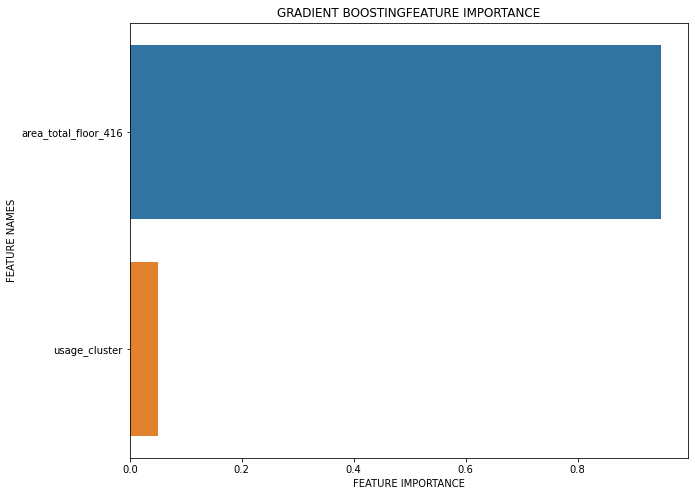

In [9]:
model = regr.fit(X, y)
charts.plot_feature_importance(model.feature_importances_, X.columns, 'GRADIENT BOOSTING')

### Decision Tree
Visualisieren des Desicion Tree

In [10]:
# TODO: Visualize decision tree